<a href="https://colab.research.google.com/github/Varunsaistark/reinforcment_learning/blob/main/duelling_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
import torch.nn as nn
 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import gym
from collections import namedtuple 
import random

import matplotlib.pyplot as plt


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
num_epochs=4
alpha=1e-4
batch_size=512

In [5]:
Experience = namedtuple('Experience',('state','action','next_state','reward','done'))

In [6]:
 
class replaymemory():
  def __init__(self,capacity):
    self.capacity=capacity
    self.memory=[]
    self.push_count=0
  
  def push(self,experience):
    if(self.push_count>self.capacity):
      self.memory[self.push_count%self.capacity]=experience
    else:
      self.memory.append(experience)
    self.push_count+=1
  
  
  def sample(self,batch_size):
    e=random.sample(self.memory,batch_size)
    #print(type(e1.state))
    states=torch.tensor([e1.state for e1 in e]).to(device)
    actions=torch.tensor([e1.action for e1 in e]).to(device)
    next=torch.tensor([e1.next_state for e1 in e]).to(device)
    rewards = torch.tensor(([e1.reward for e1 in e])).to(device)
    dones = torch.tensor([e1.done for e1 in e])
    
    #states=states.view(64,1,80,160)
    return states.float(),actions,next,rewards,dones
  
  def can_provide(self,batch_size):
    return len(self.memory)>=batch_size

In [7]:
#from google.colab import drive
 
#drive.mount('/content/drive')

In [8]:
class eps_strat():
  def __init__(self,num_actions,start,decay,end,device):
    self.cur_step=0
    self.num=num_actions
    self.device=device
    self.start=start
    self.decay=decay
    self.end=end
  def get_action(self,policy,state,step):
    self.cur_step=step
    ep=self.end+(self.start-self.end) * np.exp(-1*self.cur_step*self.decay)
    #self.cur_step=self.cur_step+1
    #print(ep,self.cur_step)
    if ep>random.random():
      #print("NO")
      action=random.randrange(self.num)
      return action
    else:
      policy.eval()
      with torch.no_grad():
        #print("yes")
        return torch.argmax(policy(state)).item()
  def get_value(self,step):
    self.cur_step=step
    ep=self.end+(self.start-self.end) * np.exp(-1*self.cur_step*self.decay)
    return ep


In [9]:
class duelling(nn.Module):
  def __init__(self,num_actions):
    super(duelling,self).__init__()
    self.a = num_actions
    self.fc1_value = nn.Linear(4,512)
    self.fc2_value = nn.Linear(512,64)
    self.fc3_value = nn.Linear(64,1)
    self.fc1_adv = nn.Linear(4,512)
    self.fc2_adv = nn.Linear(512,64)
    self.fc3_adv = nn.Linear(64,self.a)
  def forward(self,x):
    state_value = F.relu(self.fc1_value(x))
    state_value = F.relu(self.fc2_value(state_value))
    state_value = self.fc3_value(state_value)
    advantage = F.relu(self.fc1_adv(x))
    advantage = F.relu(self.fc2_adv(advantage))
    advantage = self.fc3_adv(advantage)

    return state_value+advantage-torch.mean(advantage)



In [10]:
def soft_update(local,target,t):
  for target_param,local_param in zip(target.parameters(),local.parameters()):
    target_param.data.copy_(t*local_param.data+(1-t)*target_param.data)

In [11]:
env = gym.make('CartPole-v0')
a = env.action_space.n

In [12]:
target_net = duelling(a).to(device)
policy=duelling(a).to(device)
soft_update(policy,target_net,1)



#optimizer=torch.optim.SGD(model.parameters(),lr=alpha)

In [13]:
mem=replaymemory(10000)

In [14]:
env = env.unwrapped
ob=env.reset()

done_1=False
print(ob.shape)

gamma=torch.tensor(0.99)

start=1
end=0.00001
decay=0.01


#tau for soft update
 
tau=0.89

t_decay=eps_strat(2,0.9,0.01,0.001,device)
print(tau)
print(env.action_space.n)

(4,)
0.89
2


0 16.0


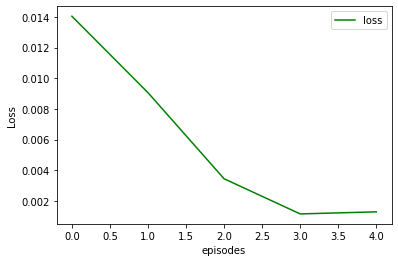

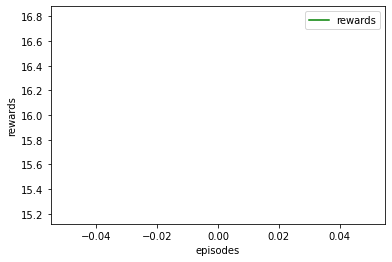

1 20.0
2 10.0
3 48.0
4 73.0
5 73.0
6 69.0
7 59.0
8 88.0
9 70.0
10 108.0
11 76.0
12 81.0
13 68.0
14 42.0
15 313.0
16 124.0
17 33.0
18 41.0
19 68.0
20 10.0
21 63.0
22 45.0
23 44.0
24 39.0
25 39.0
26 115.0
27 183.0
28 46.0
29 41.0
30 43.0
31 41.0
32 166.0
33 109.0
34 89.0
35 35.0
36 95.0
37 36.0
38 116.0
39 130.0
40 51.0
41 41.0
42 17.0
43 22.0
44 34.0
45 37.0
46 19.0
47 20.0
48 20.0
49 28.0
50 14.0
51 22.0
52 81.0
53 163.0
54 14.0
55 156.0
56 18.0
57 42.0
58 18.0
59 19.0
60 77.0
61 114.0
62 242.0
63 97.0
64 101477.0
65 10.0
66 13.0
67 91.0
68 10.0
69 100.0
70 80.0
71 25.0
72 796.0
73 24.0
74 124.0
75 194.0
76 149.0
77 1263.0
78 79.0
79 88.0
80 28.0
81 12.0
82 455.0
83 24.0
84 67.0
85 157.0
86 38.0
87 20.0
88 72.0
89 13.0
90 194.0
91 358.0
92 29.0
93 616.0
94 32.0
95 159.0
96 211.0
97 25.0
98 364.0
99 28.0
100 31.0


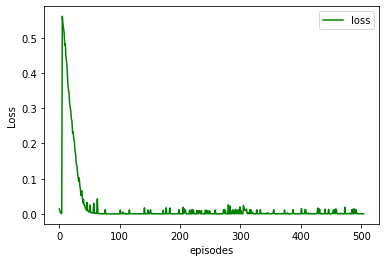

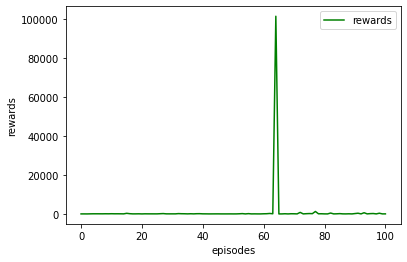

101 114.0
102 153.0
103 55.0
104 89.0
105 104.0
106 81.0
107 39.0
108 90.0
109 110.0
110 64.0
111 100.0
112 152.0
113 159.0
114 157.0
115 288.0
116 590.0
117 27.0
118 33.0
119 293.0
120 80.0
121 113.0
122 126.0
123 34.0
124 23.0
125 45.0
126 125.0
127 129.0
128 272.0
129 282.0
130 10.0
131 37.0
132 123.0
133 43.0
134 23.0
135 19.0
136 96.0
137 87.0
138 185.0
139 144.0
140 65.0
141 27.0
142 54.0
143 106.0
144 53.0
145 48.0
146 43.0
147 47.0
148 13.0
149 62.0
150 119.0
151 51.0
152 70.0
153 18.0
154 77.0
155 120.0
156 47.0
157 87.0
158 12.0
159 45.0
160 15.0
161 10.0
162 33.0
163 29.0
164 51.0
165 121.0
166 30.0
167 137.0
168 168.0
169 93.0
170 108.0
171 10.0
172 36.0
173 35.0
174 141.0
175 43.0
176 96.0
177 84.0
178 130.0
179 31.0
180 155.0
181 93.0


KeyboardInterrupt: ignored

In [16]:
FILE='/content/drive/MyDrive/target_duellingcartpole.pth'
File='/content/drive/MyDrive/model_duellingcartpole.pth'
#torch.save(policy.state_dict(),File)
step=0
step_1=0
eps=0
lo=[]
re=[]
num_episodes=10000
for eps in range(num_episodes):
  
  reward_sum=0
  state=env.reset()
  
  done_1=False
  
  while not done_1:
    step=step+1
    ep=eps_strat(2,start,decay,end,device)
    st = torch.tensor(state)
    action= ep.get_action(policy,st.float().to(device),step)
    #print(action)
    
    next_state,reward,done_1,info=env.step(action)

 

    
 
    e1=Experience(state,action,next_state,reward,done_1)

    mem.push(e1)
    reward_sum+=reward
    
    state=next_state
    #print(reward)
  
  re.append(reward_sum)
  #if reward_sum>280:
  print(eps,reward_sum)
  
  if mem.can_provide(64):
    epochs=5
    for i in range(epochs):
      states_1,actions,next_states,rewards,done=mem.sample(64)
      ex = policy.forward(next_states.float()).detach().cpu().numpy().tolist()
     
      target_q=target_net.forward(next_states.float()).detach().cpu().numpy()
      #print(target_q)
      j=[t.index(max(t)) for t in ex]
     
      target_q=torch.tensor([target_q[i][j[i]] for i in range(len(j))]).to(device).detach()
      #cv2_imshow(states_1[0][0].cpu(that loss becoming 0 is still persisi).numpy())
      done=done.int().to(device)
  
      q=(rewards+gamma*(target_q*(1-done))).detach()
      q=q.unsqueeze(1)
    #print(gamma*(target_q*(1-done)))
      l=torch.tensor([actions[i] for i in range(64)]).to(device)
      l=l.unsqueeze(1)
      exp_q=policy.forward(states_1.float()).gather(-1,l)
    
      loss=nn.MSELoss()
      tr=loss(exp_q,q)
      #print(tr)
    #print("loss is {}".format(tr))
      lo.append(tr)
    #print(tr)
      optimizer= torch.optim.Adam(policy.parameters(),lr=alpha)
      optimizer.zero_grad()
      tr.backward()
    # optimizer
    
      optimizer.step()
    
   
  if eps%100 ==0:
    #step_1=step_1+1
    #tau=t_decay.get_value(step_1)
    soft_update(policy,target_net,0.78) 
    episodes=range(len(lo))
    epi=range(len(re))
    plt.plot(episodes,lo,'g',label='loss')
    plt.xlabel('episodes')
    plt.ylabel('Loss')
    plt.legend()
    plt.show() 
    plt.plot(epi,re,'g',label='rewards')
    plt.xlabel('episodes')
    plt.ylabel('rewards')
    plt.legend()
    plt.show() 
  #if eps%50==0:
   # torch.save(target_net.state_dict(),FILE)
   # torch.save(policy.state_dict(),File)
   # print("Weights saved")